


---



---


# 📌 **UAS (FINALTERM) FOR MACHINE LEARNING**

# Regression : Song Year Prediction (Prediksi Tahun Lagu)


---



---





# **Import Required Libraries**

* Data Processing: pandas dan numpy untuk manipulasi data tabel dan array.

* Visualization: matplotlib dan seaborn untuk membuat grafik distribusi data.

* Machine Learning Tools:

> train_test_split: Untuk membagi data menjadi data latih dan uji.

> StandardScaler, RobustScaler: Untuk normalisasi data (agar skala angka antar fitur seragam).

> mean_squared_error, r2_score, dll: Metrik untuk mengukur seberapa akurat prediksi tahunnya.

* Models:

> Linear: LinearRegression, Ridge, Lasso (model dasar).

> Ensemble: RandomForest, GradientBoosting (model berbasis pohon keputusan).

> Boosting: XGBoost, LightGBM (algoritma gradient boosting yang sangat efisien dan populer untuk data tabel).

* Deep Learning: tensorflow dan keras untuk membangun jaringan saraf tiruan (Neural Network).

In [ ]:

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error
)

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


# **Load and Explore the Data**

Kolom pertama (indeks 0 tahun 2001) diambil sebagai Target (y), yaitu tahun rilis lagu.

Kolom sisanya (1-90) diambil sebagai Fitur (X), yang merupakan karakteristik audio (timbre).

In [ ]:
# Load dataset
df = pd.read_csv('midterm-regresi-dataset.csv', header=None)

print("Dataset shape:", df.shape)
print("\n" + "="*50)
print("First few rows:")
df.head()

Dataset shape: (515345, 91)

First few rows:


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
# Separate target and features
# First column is the target (year), rest are features
y = df.iloc[:, 0].values  # Target: release year
X = df.iloc[:, 1:].values  # Features: audio characteristics

print(f"Target shape: {y.shape}")
print(f"Features shape: {X.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Target shape: (515345,)
Features shape: (515345, 90)

Number of features: 90
Number of samples: 515345


In [ ]:
# Basic statistics of the target variable
print("Target Variable (Release Year) Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {np.median(y):.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.0f}")
print(f"Max: {y.max():.0f}")
print(f"Range: {y.max() - y.min():.0f} years")

Target Variable (Release Year) Statistics:
Mean: 1998.40
Median: 2002.00
Std Dev: 10.93
Min: 1922
Max: 2011
Range: 89 years


# **Visualize target distribution**

Kode ini digunakan untuk memvisualisasikan distribusi variabel target (tahun rilis) menggunakan histogram, box plot, dan violin plot guna memahami sebaran data, kecenderungan pusat, serta potensi outlier.

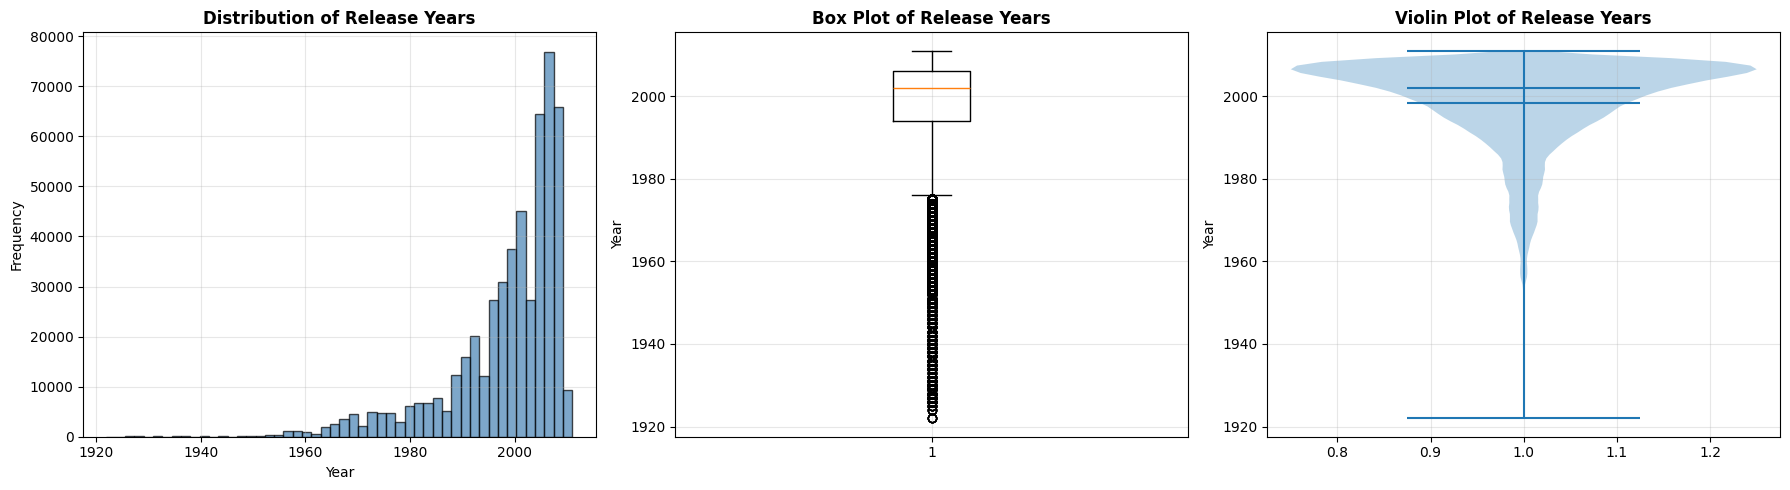

In [ ]:
# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(y, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Release Years', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(y, vert=True)
axes[1].set_title('Box Plot of Release Years', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Year')
axes[1].grid(True, alpha=0.3)

# Violin plot
parts = axes[2].violinplot([y], vert=True, showmeans=True, showmedians=True)
axes[2].set_title('Violin Plot of Release Years', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Year')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values
print("Missing Values in Dataset:")
print(f"Target: {np.isnan(y).sum()}")
print(f"Features: {np.isnan(X).sum()}")

if np.isnan(X).sum() > 0:
    print(f"\nPercentage of missing values: {(np.isnan(X).sum() / X.size * 100):.2f}%")

Missing Values in Dataset:
Target: 0
Features: 0


# **Data Preprocessing**

* DataFrame Creation: Mengubah array numpy menjadi pandas DataFrame dan memberi nama kolom otomatis (feature_1 sampai feature_90) agar lebih mudah dibaca.


In [ ]:
# Create DataFrame for easier manipulation
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
y_series = pd.Series(y, name='year')

print("Features DataFrame:")
X_df.head()

Features DataFrame:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


* Statistik Fitur: Menggunakan describe() untuk melihat rentang nilai fitur audio. Terlihat bahwa skala antar fitur sangat berbeda (ada yang puluhan, ada yang ribuan), sehingga Scaling (penyekalaan) nanti akan sangat penting.

In [ ]:
# Statistical summary of features
print("Feature Statistics:")
X_df.describe()

Feature Statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,-2.444850,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,1.783520,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,6.147220,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


# **Deteksi Outlier**


Menggunakan metode IQR (Interquartile Range) untuk mendeteksi tahun yang dianggap "anomali" (misalnya lagu yang sangat tua). Namun, kode memutuskan untuk tetap menyimpan data tersebut karena tahun 1920-an adalah data valid, bukan error.

In [ ]:
# Detect and handle outliers using IQR method
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using Interquartile Range (IQR) method
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

# Check for outliers in target variable
outliers_y, lower_y, upper_y = detect_outliers_iqr(y)
print(f"Outliers in target variable: {outliers_y.sum()} ({outliers_y.sum()/len(y)*100:.2f}%)")
print(f"Target range without outliers: [{lower_y:.0f}, {upper_y:.0f}]")

# For this task, we'll keep outliers as they represent valid years
print("\nNote: Keeping all data points as they represent valid release years.")

Outliers in target variable: 29703 (5.76%)
Target range without outliers: [1976, 2024]

Note: Keeping all data points as they represent valid release years.


# **Visualize feature distributions**
Kode ini memvisualisasikan distribusi beberapa fitur awal dalam dataset menggunakan histogram untuk memahami pola sebaran dan karakteristik setiap fitur.

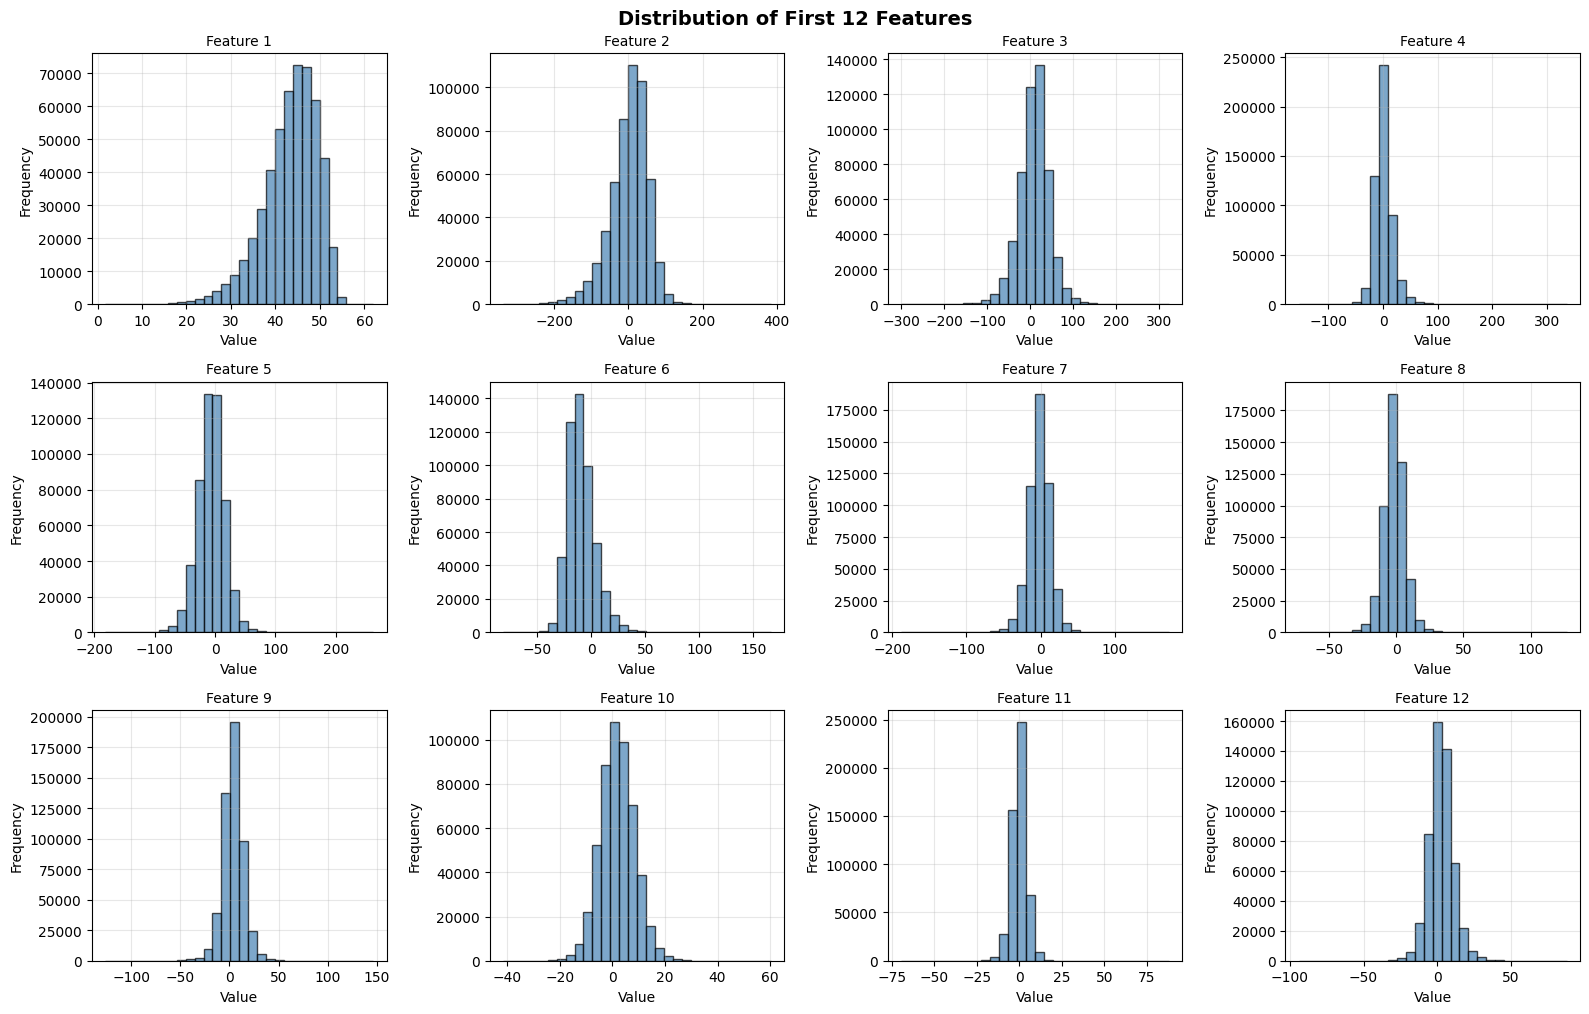

In [ ]:
# Visualize feature distributions (sample of first 12 features)
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i in range(min(12, X.shape[1])):
    axes[i].hist(X[:, i], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Feature {i+1}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of First 12 Features', fontsize=14, fontweight='bold', y=1.01)
plt.show()

# **Train-Test Split data**

Kode ini membagi dataset menjadi data latih dan data uji, serta menampilkan jumlah sampel dan rentang nilai target pada masing-masing subset.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set year range: [{y_train.min():.0f}, {y_train.max():.0f}]")
print(f"Test set year range: [{y_test.min():.0f}, {y_test.max():.0f}]")

Training set size: 412276 samples
Test set size: 103069 samples

Training set year range: [1922, 2011]
Test set year range: [1924, 2010]


# **Feature Scaling**
Kode ini menerapkan feature scaling menggunakan StandardScaler untuk menormalkan fitur data latih dan uji agar memiliki rata-rata mendekati nol dan deviasi standar satu, sehingga membantu meningkatkan kinerja model.

In [ ]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")
print(f"\nMean of scaled features (should be ~0): {X_train_scaled.mean():.6f}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std():.6f}")

Feature scaling completed!
Scaled training features shape: (412276, 90)
Scaled test features shape: (103069, 90)

Mean of scaled features (should be ~0): -0.000000
Std of scaled features (should be ~1): 1.000000


# **Build Machine Learning Models**
Kode ini mendefinisikan fungsi untuk melatih dan mengevaluasi model regresi menggunakan metrik MSE, RMSE, MAE, dan R² pada data training dan testing.

In [ ]:
# Function to evaluate regression models
def evaluate_regression_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Train and evaluate a regression model
    """
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"\nTraining Set:")
    print(f"  MSE:  {train_mse:.4f}")
    print(f"  RMSE: {train_rmse:.4f}")
    print(f"  MAE:  {train_mae:.4f}")
    print(f"  R²:   {train_r2:.4f}")

    print(f"\nTest Set:")
    print(f"  MSE:  {test_mse:.4f}")
    print(f"  RMSE: {test_rmse:.4f}")
    print(f"  MAE:  {test_mae:.4f}")
    print(f"  R²:   {test_r2:.4f}")

    return {
        'model': model,
        'model_name': model_name,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

# **Train Linear Regression**

Kode ini melatih dan mengevaluasi model Linear Regression menggunakan data yang telah diskalakan, kemudian menampilkan metrik performa pada data training dan testing.

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_regression_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Linear Regression")


Training Linear Regression...

Linear Regression Results:

Training Set:
  MSE:  91.2926
  RMSE: 9.5547
  MAE:  6.7996
  R²:   0.2367

Test Set:
  MSE:  90.6935
  RMSE: 9.5233
  MAE:  6.7782
  R²:   0.2380


# **Train Ridge Regression**

Kode ini melatih dan mengevaluasi model Ridge Regression dengan regularisasi L2 untuk mengurangi overfitting dan meningkatkan generalisasi model.

In [ ]:
# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_results = evaluate_regression_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")


Training Ridge Regression...

Ridge Regression Results:

Training Set:
  MSE:  91.2926
  RMSE: 9.5547
  MAE:  6.7996
  R²:   0.2367

Test Set:
  MSE:  90.6935
  RMSE: 9.5233
  MAE:  6.7782
  R²:   0.2380


# **Train Lasso Regression**

Kode ini melatih dan mengevaluasi model Lasso Regression dengan regularisasi L1 untuk seleksi fitur dan mengurangi overfitting.



In [ ]:
# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso_results = evaluate_regression_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")


Training Lasso Regression...

Lasso Regression Results:

Training Set:
  MSE:  92.4113
  RMSE: 9.6131
  MAE:  6.8470
  R²:   0.2274

Test Set:
  MSE:  91.7254
  RMSE: 9.5773
  MAE:  6.8202
  R²:   0.2293


# **Train Random Forest**
Kode ini melatih dan mengevaluasi model Random Forest Regressor untuk menangkap hubungan non-linear pada data serta menilai performanya pada data training dan testing.






In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_results = evaluate_regression_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")


Training Random Forest...

Random Forest Results:

Training Set:
  MSE:  53.1802
  RMSE: 7.2925
  MAE:  5.2408
  R²:   0.5554

Test Set:
  MSE:  84.1409
  RMSE: 9.1728
  MAE:  6.4457
  R²:   0.2930


# **Train XGBoost**

Kode ini melatih dan mengevaluasi model XGBoost Regressor untuk menangkap pola kompleks pada data serta membandingkan kinerjanya menggunakan metrik regresi standar.

In [ ]:
# XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_results = evaluate_regression_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test, "XGBoost")


Training XGBoost...

XGBoost Results:

Training Set:
  MSE:  77.4869
  RMSE: 8.8027
  MAE:  6.1781
  R²:   0.3521

Test Set:
  MSE:  81.0904
  RMSE: 9.0050
  MAE:  6.2985
  R²:   0.3187


# **Train LightGBM**

Kode ini melatih dan mengevaluasi model LightGBM Regressor yang efisien dan cepat untuk data tabular, serta menilai performanya menggunakan metrik regresi.



In [ ]:
# LightGBM
lgbm_model = LGBMRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_results = evaluate_regression_model(lgbm_model, X_train_scaled, y_train, X_test_scaled, y_test, "LightGBM")


Training LightGBM...

LightGBM Results:

Training Set:
  MSE:  79.6388
  RMSE: 8.9241
  MAE:  6.2593
  R²:   0.3342

Test Set:
  MSE:  81.7643
  RMSE: 9.0424
  MAE:  6.3254
  R²:   0.3130


# **Build Deep Learning Model**
Kode ini membangun dan mengompilasi model Neural Network untuk regresi dengan beberapa layer Dense, batch normalization, dan dropout guna meningkatkan stabilitas training dan mengurangi overfitting.


In [ ]:
# Build Neural Network for Regression
def build_regression_nn(input_dim):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        layers.Dense(1)  # Output layer for regression (no activation)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', keras.metrics.RootMeanSquaredError(name='rmse')]
    )

    return model

# Create the model
nn_model = build_regression_nn(X_train_scaled.shape[1])
nn_model.summary()

# **Train Model**
Kode ini mendefinisikan callback Early Stopping dan Reduce Learning Rate, lalu melatih model Neural Network untuk regresi dengan validasi guna mencegah overfitting dan meningkatkan konvergensi.

In [ ]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("Training Neural Network...")
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# **Visualisai**
Kode ini memvisualisasikan riwayat pelatihan Neural Network regresi dengan menampilkan grafik loss (MSE), MAE, dan RMSE pada data training dan validasi untuk mengevaluasi performa model selama epoch.

In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Model Loss (MSE)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# MAE
axes[1].plot(history.history['mae'], label='Train MAE')
axes[1].plot(history.history['val_mae'], label='Val MAE')
axes[1].set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

# RMSE
axes[2].plot(history.history['rmse'], label='Train RMSE')
axes[2].plot(history.history['val_rmse'], label='Val RMSE')
axes[2].set_title('Root Mean Squared Error', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('RMSE')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# **Evaluasi Model**
Kode ini menghitung metrik performa model regresi berbasis Neural Network pada data training dan testing:

* MSE (Mean Squared Error) → kesalahan kuadrat rata-rata.

* RMSE (Root Mean Squared Error) → akar MSE, satuan sama dengan target.

* MAE (Mean Absolute Error) → kesalahan absolut rata-rata.

* R² (R-squared) → proporsi variansi target yang dijelaskan oleh model.



In [ ]:
# Evaluate Neural Network
print("\n" + "="*60)
print("Evaluating Neural Network...")
print("="*60)

# Predictions
y_train_pred_nn = nn_model.predict(X_train_scaled).flatten()
y_test_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Calculate metrics
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
train_rmse_nn = np.sqrt(train_mse_nn)
test_rmse_nn = np.sqrt(test_mse_nn)
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print(f"\nNeural Network Results:")
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse_nn:.4f}")
print(f"  RMSE: {train_rmse_nn:.4f}")
print(f"  MAE:  {train_mae_nn:.4f}")
print(f"  R²:   {train_r2_nn:.4f}")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse_nn:.4f}")
print(f"  RMSE: {test_rmse_nn:.4f}")
print(f"  MAE:  {test_mae_nn:.4f}")
print(f"  R²:   {test_r2_nn:.4f}")

# Store results
nn_results = {
    'model': nn_model,
    'model_name': 'Neural Network',
    'train_mse': train_mse_nn,
    'test_mse': test_mse_nn,
    'train_rmse': train_rmse_nn,
    'test_rmse': test_rmse_nn,
    'train_mae': train_mae_nn,
    'test_mae': test_mae_nn,
    'train_r2': train_r2_nn,
    'test_r2': test_r2_nn,
    'y_train_pred': y_train_pred_nn,
    'y_test_pred': y_test_pred_nn
}

# **Model Comparison**

* Tabel comparison_df menampilkan: Train RMSE, Test RMSE, Train MAE, Test MAE, Train R², Test R² untuk semua model: Linear Regression, Ridge, Lasso, Random Forest, XGBoost, dan LightGBM.

* Best Model dipilih berdasarkan Test R² tertinggi, yaitu model yang mampu menjelaskan variansi data test paling baik.

In [ ]:
# Compile all results
all_results = [lr_results, ridge_results, lasso_results, rf_results, xgb_results, lgbm_results]

# Create comparison dataframe
comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Train RMSE': result['train_rmse'],
        'Test RMSE': result['test_rmse'],
        'Train MAE': result['train_mae'],
        'Test MAE': result['test_mae'],
        'Train R²': result['train_r2'],
        'Test R²': result['test_r2']
    }
    for result in all_results
])

print("\n" + "="*100)
print("MODEL COMPARISON SUMMARY")
print("="*100)
print(comparison_df.to_string(index=False))
print("\n" + "="*100)

# Find best model based on Test R²
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model (by Test R²): {best_model_name}")
print(f"Test R²: {comparison_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"Test RMSE: {comparison_df.loc[best_model_idx, 'Test RMSE']:.4f} years")
print(f"Test MAE: {comparison_df.loc[best_model_idx, 'Test MAE']:.4f} years")


MODEL COMPARISON SUMMARY
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²
Linear Regression    9.554714   9.523312   6.799611  6.778169  0.236719 0.237966
 Ridge Regression    9.554714   9.523312   6.799612  6.778170  0.236719 0.237966
 Lasso Regression    9.613078   9.577340   6.847025  6.820170  0.227366 0.229295
    Random Forest    7.292475   9.172834   5.240776  6.445725  0.555370 0.293023
          XGBoost    8.802662   9.005022   6.178125  6.298486  0.352146 0.318654
         LightGBM    8.924056   9.042359   6.259323  6.325384  0.334154 0.312992


Best Model (by Test R²): XGBoost
Test R²: 0.3187
Test RMSE: 9.0050 years
Test MAE: 6.2985 years


# **Visualize model comparison**

Kode ini membuat grafik batang untuk membandingkan performa beberapa model regresi berdasarkan RMSE, MAE, dan R², baik pada data training maupun test, dengan label nilai pada setiap batang agar mudah dibaca.

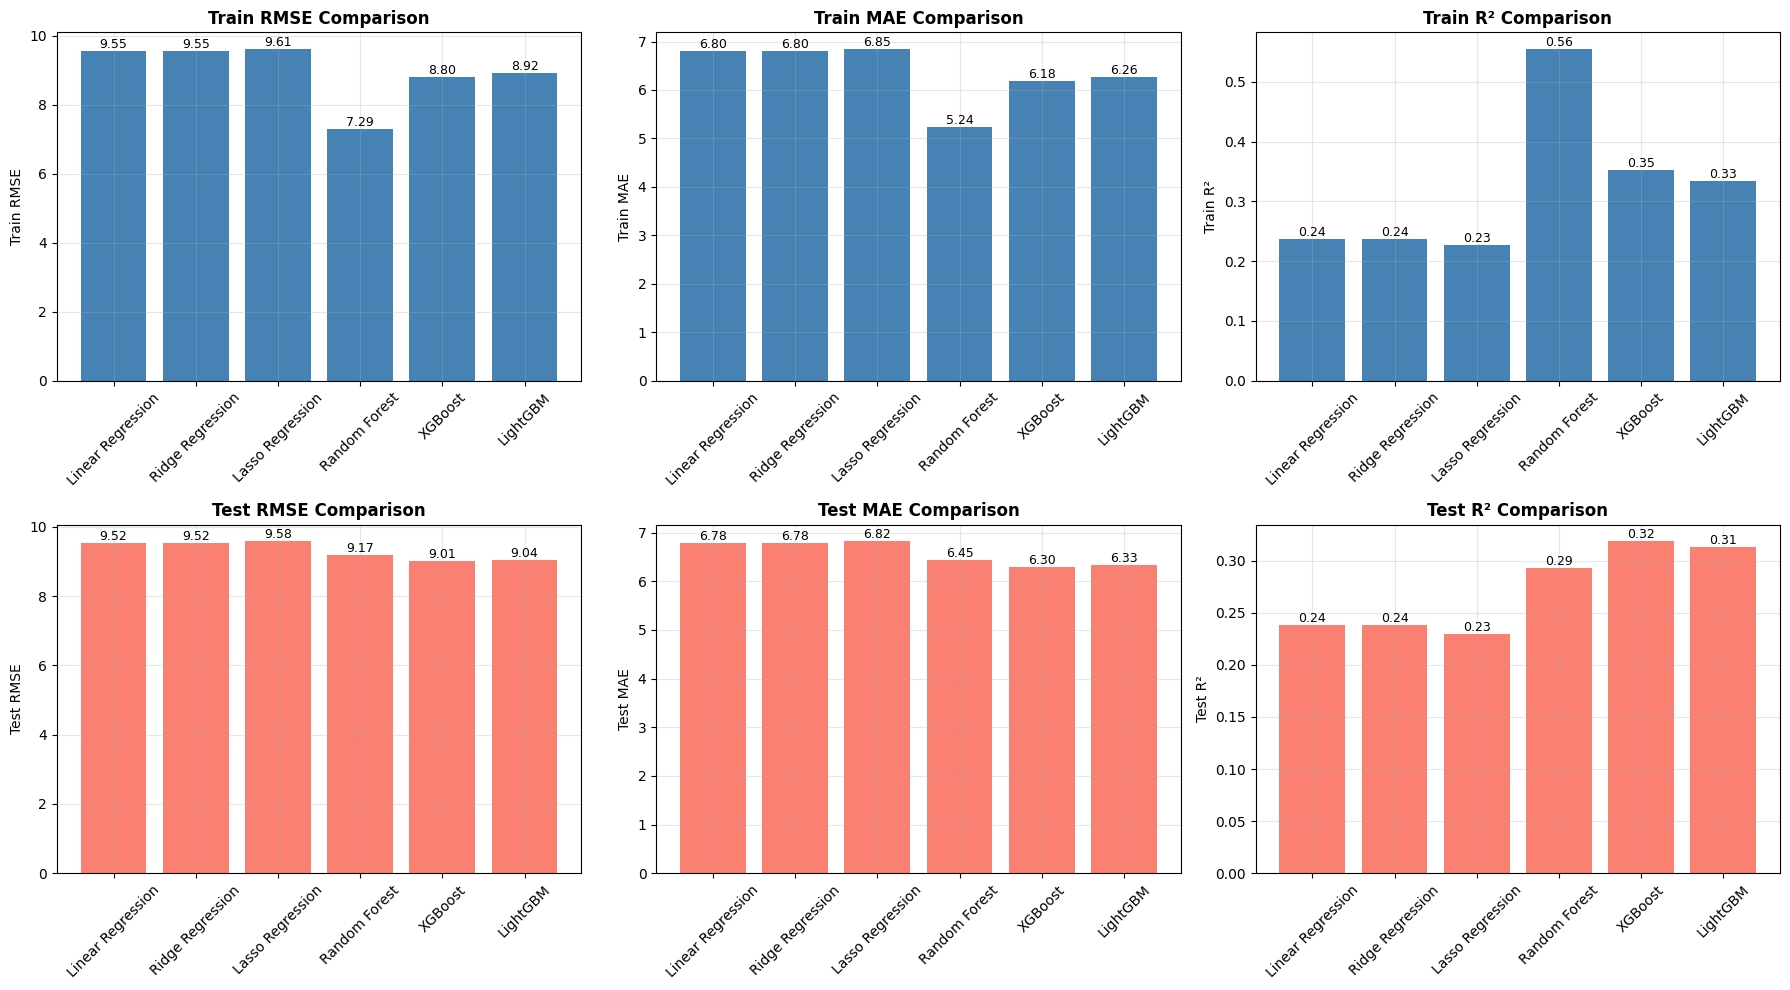

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = [('Train RMSE', 'Test RMSE'), ('Train MAE', 'Test MAE'), ('Train R²', 'Test R²')]

for idx, (train_metric, test_metric) in enumerate(metrics):
    # Training metrics
    row = 0
    col = idx
    axes[row, col].bar(comparison_df['Model'], comparison_df[train_metric], color='steelblue')
    axes[row, col].set_title(f'{train_metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(train_metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

    # Add value labels
    for i, v in enumerate(comparison_df[train_metric]):
        axes[row, col].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

    # Test metrics
    row = 1
    axes[row, col].bar(comparison_df['Model'], comparison_df[test_metric], color='salmon')
    axes[row, col].set_title(f'{test_metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(test_metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

    # Add value labels
    for i, v in enumerate(comparison_df[test_metric]):
        axes[row, col].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# **Model Prediction Analysis**

Kode ini menampilkan prediksi model terbaik dengan dua cara: pertama, scatter plot antara nilai aktual dan prediksi untuk melihat seberapa dekat prediksi dengan data asli; kedua, residual plot untuk mengevaluasi kesalahan prediksi (residual) dan mendeteksi pola bias. Selain itu, dihitung statistik residual seperti rata-rata, standar deviasi, nilai minimum, dan maksimum untuk menilai akurasi dan konsistensi model.

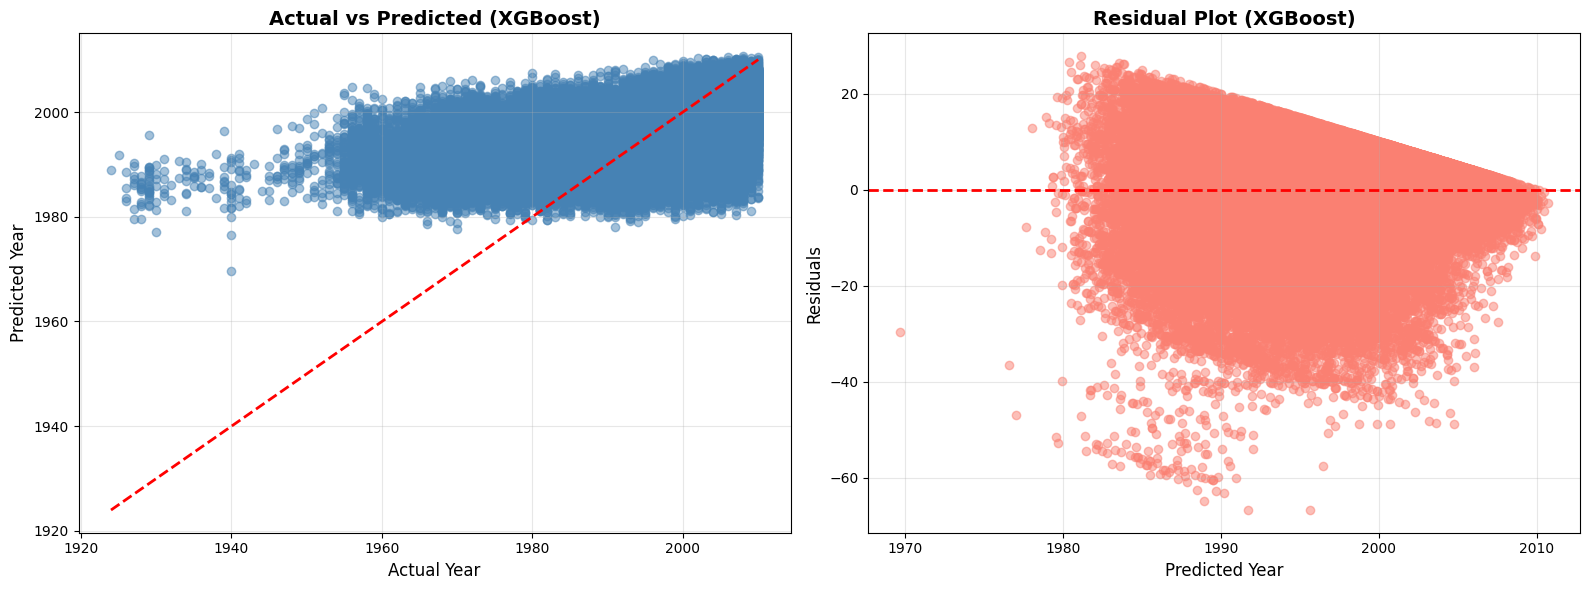


Residual Analysis for XGBoost:
Mean Residual: 0.0163
Std Residual: 9.0050
Min Residual: -66.7142
Max Residual: 27.8683


In [ ]:
# Get best model predictions
best_result = all_results[best_model_idx]
y_test_pred_best = best_result['y_test_pred']

# Scatter plot: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_test, y_test_pred_best, alpha=0.5, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Year', fontsize=12)
axes[0].set_ylabel('Predicted Year', fontsize=12)
axes[0].set_title(f'Actual vs Predicted ({best_model_name})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test - y_test_pred_best
axes[1].scatter(y_test_pred_best, residuals, alpha=0.5, color='salmon')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Year', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title(f'Residual Plot ({best_model_name})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual statistics
print(f"\nResidual Analysis for {best_model_name}:")
print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual: {residuals.std():.4f}")
print(f"Min Residual: {residuals.min():.4f}")
print(f"Max Residual: {residuals.max():.4f}")

# **Distribution of prediction**
Kode ini menganalisis kesalahan prediksi (residual) model terbaik dengan dua cara: pertama, histogram residual untuk melihat sebaran kesalahan dan memeriksa apakah sebagian besar prediksi dekat dengan nilai aktual; kedua, Q-Q plot untuk mengecek normalitas residual, yang membantu menilai apakah asumsi distribusi kesalahan model terpenuhi.

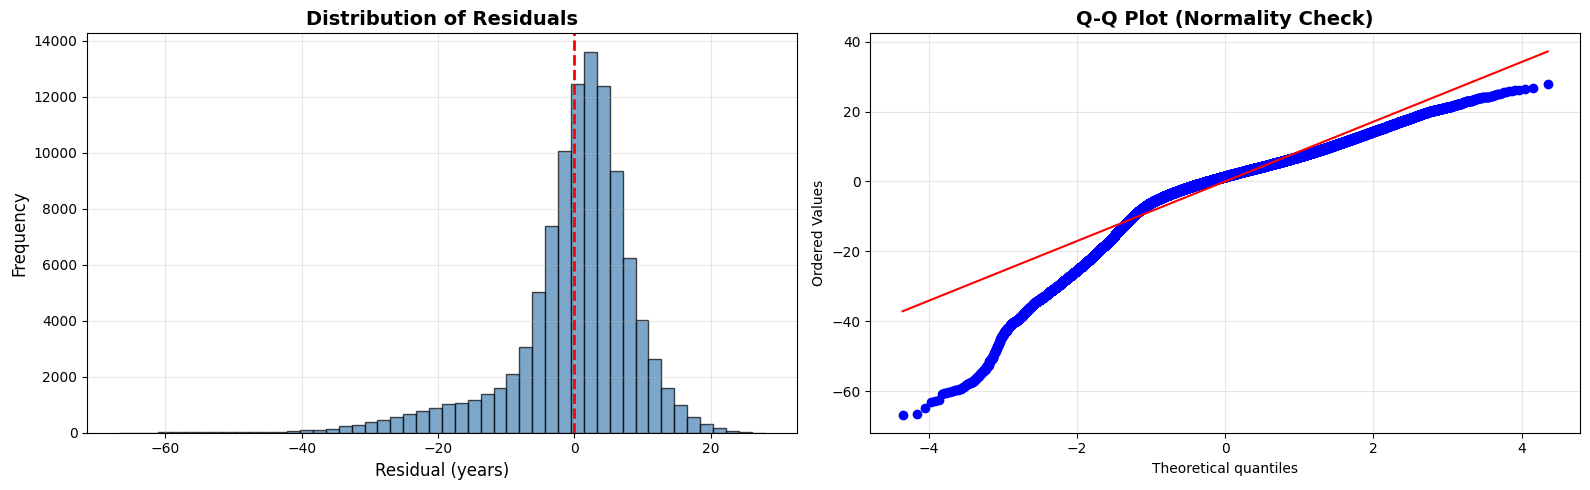

In [ ]:
# Distribution of prediction errors
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Residual (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Compare predictions across all models**

Kode ini membandingkan kinerja semua model regresi dengan membuat scatter plot “Actual vs Predicted” untuk masing-masing model, sehingga kita bisa melihat seberapa dekat prediksi tiap model dengan nilai aktual. Setiap subplot menampilkan R² dan RMSE untuk memudahkan perbandingan akurasi antar model. Subplot terakhir dikosongkan karena jumlah plot lebih sedikit dari total subplot yang dibuat.

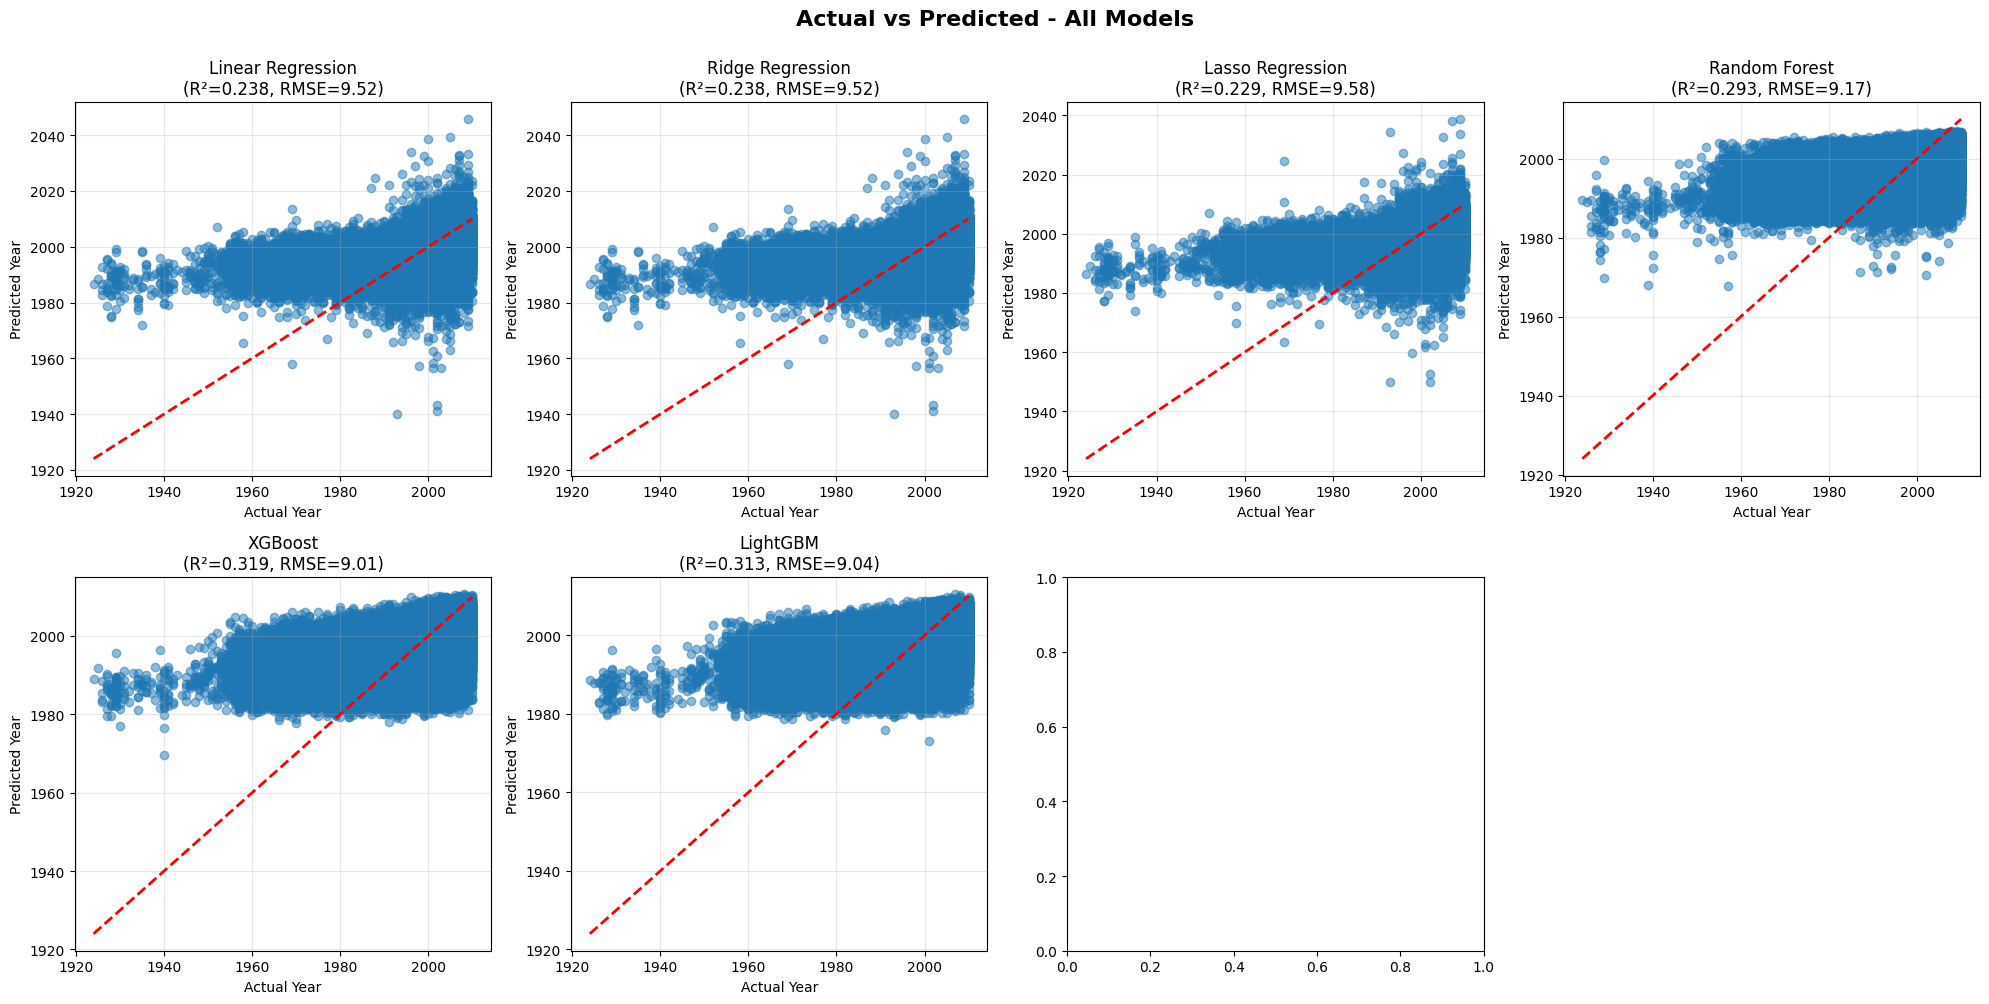

In [ ]:
# Compare predictions across all models
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, result in enumerate(all_results):
    y_pred = result['y_test_pred']
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Year')
    axes[idx].set_ylabel('Predicted Year')
    axes[idx].set_title(f"{result['model_name']}\n(R²={result['test_r2']:.3f}, RMSE={result['test_rmse']:.2f})")
    axes[idx].grid(True, alpha=0.3)

# Hide the last subplot
axes[7].axis('off')

plt.suptitle('Actual vs Predicted - All Models', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# **Feature Importance Analysis**

Kode ini mengekstrak feature importance dari model Random Forest yang sudah dilatih untuk mengetahui fitur mana yang paling berpengaruh terhadap prediksi. Setelah itu, kode memvisualisasikan 20 fitur teratas dalam bentuk bar chart horizontal dan menampilkan daftar nilai pentingnya, sehingga kita bisa melihat fitur mana yang paling dominan dalam mempengaruhi hasil prediksi model.

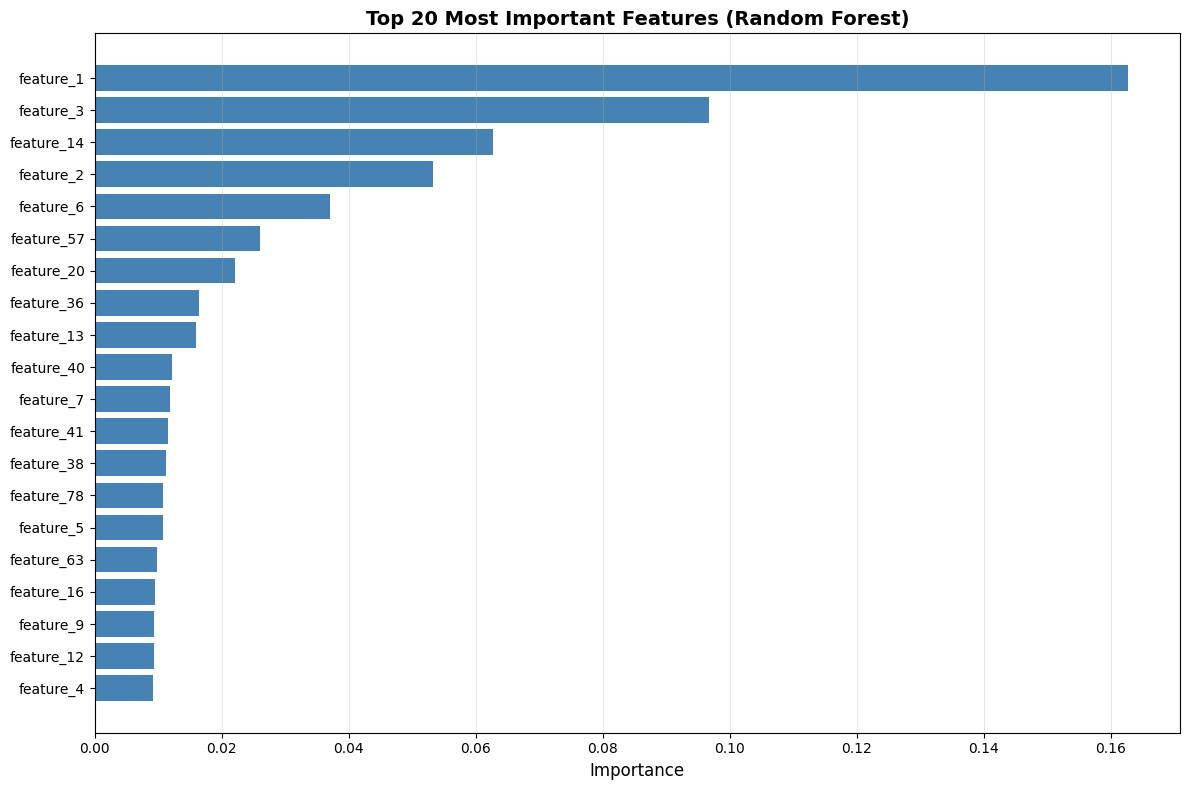

Top 20 Most Important Features:
       feature  importance
0    feature_1    0.162737
2    feature_3    0.096750
13  feature_14    0.062669
1    feature_2    0.053308
5    feature_6    0.037074
56  feature_57    0.025974
19  feature_20    0.022081
35  feature_36    0.016342
12  feature_13    0.015889
39  feature_40    0.012199
6    feature_7    0.011875
40  feature_41    0.011516
37  feature_38    0.011139
77  feature_78    0.010780
4    feature_5    0.010725
62  feature_63    0.009818
15  feature_16    0.009416
8    feature_9    0.009294
11  feature_12    0.009250
3    feature_4    0.009122


In [ ]:
# Feature importance from Random Forest
if 'Random Forest' in [r['model_name'] for r in all_results]:
    rf_idx = [r['model_name'] for r in all_results].index('Random Forest')
    rf_model_trained = all_results[rf_idx]['model']

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model_trained.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    top_20 = feature_importance.head(20)
    plt.barh(range(len(top_20)), top_20['importance'], color='steelblue')
    plt.yticks(range(len(top_20)), top_20['feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

    print("Top 20 Most Important Features:")
    print(feature_importance.head(20))

# **Summary**


SONG YEAR PREDICTION PROJECT SUMMARY


1. Dataset Statistics:
   - Total samples: 515345
   - Number of features: 90
   - Year range: 1922 - 2011
   - Training set: 412276 samples
   - Test set: 103069 samples

2. Models Evaluated:
   1. Linear Regression
   2. Ridge Regression
   3. Lasso Regression
   4. Random Forest
   5. XGBoost
   6. LightGBM

3. Best Model: XGBoost
   - Test R²: 0.3187
   - Test RMSE: 9.0050 years
   - Test MAE: 6.2985 years
   - Interpretation: On average, predictions are off by ~6.3 years

4. Key Techniques Used:
   - Feature scaling (StandardScaler)
   - Multiple regression algorithms (Linear, Ridge, Lasso, RF, XGBoost, LightGBM)
   - Deep Learning (Neural Network with batch normalization and dropout)
   - Comprehensive evaluation metrics (MSE, RMSE, MAE, R²)
   - Residual analysis and visualization

5. Model Performance Ranking (by Test R²):
   1. XGBoost              - R²: 0.3187, RMSE: 9.01
   2. LightGBM             - R²: 0.3130, RMSE: 9.04
   3. Random Forest        - R²: 0.2930, RMSE: 9.17
   4. Ridge Regression     - R²: 0.2380, RMSE: 9.52
   5. Linear Regression    - R²: 0.2380, RMSE: 9.52
   6. Lasso Regression     - R²: 0.2293, RMSE: 9.58